<a href="https://colab.research.google.com/github/mohamedyasser951/MachineLearning/blob/main/DigitRecognitionWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install tensorflow==2.6
# ! pip install keras==2.6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout,Activation


Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/keras-2.6.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.6.0


In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

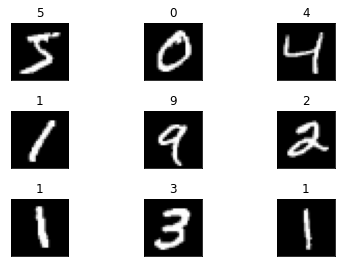

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap="gray")
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])

In [ ]:
#Reshape
x_train =x_train.reshape(60000,784)
x_test =x_test.reshape(10000,784)
x_train= x_train.astype("float32")
x_test= x_test.astype("float32")

In [ ]:
#Normalization
x_train /=255
x_test /=255

In [ ]:
#one Hot Encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)
y_train.shape

(60000, 10)

In [ ]:
# from tensorflow.keras.models import Sequential
model = tf.keras.models.Sequential()
model.add(Dense(1000,input_shape=(784,),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")


In [ ]:
#training the model 

data = model.fit(x_train,y_train,epochs=20,batch_size=128,verbose=2,validation_data=(x_test,y_test))

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 - 18s - loss: 0.2259 - accuracy: 0.9311 - val_loss: 0.0951 - val_accuracy: 0.9694 - 18s/epoch - 38ms/step
Epoch 2/20
469/469 - 17s - loss: 0.0905 - accuracy: 0.9719 - val_loss: 0.0827 - val_accuracy: 0.9727 - 17s/epoch - 35ms/step
Epoch 3/20
469/469 - 17s - loss: 0.0665 - accuracy: 0.9793 - val_loss: 0.0650 - val_accuracy: 0.9788 - 17s/epoch - 36ms/step
Epoch 4/20
469/469 - 21s - loss: 0.0494 - accuracy: 0.9835 - val_loss: 0.0673 - val_accuracy: 0.9781 - 21s/epoch - 45ms/step
Epoch 5/20
469/469 - 17s - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0659 - val_accuracy: 0.9827 - 17s/epoch - 37ms/step
Epoch 6/20
469/469 - 17s - loss: 0.0355 - a

In [ ]:
loss_and_accuracy = model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0740 - accuracy: 0.9845


In [ ]:
predicated_classes = model.predict(x_test)
predicated_classes = np.argmax(predicated_classes,axis=-1)


313/313 [==============================] - 2s 8ms/step


array([7, 2, 1, ..., 4, 5, 6])

6


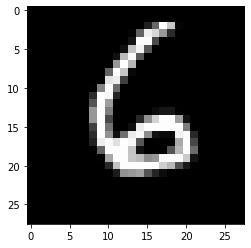

In [ ]:
print(predicated_classes[600])
plt.imshow(x_test[600].reshape(28,28),cmap="gray")